In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("Logistic_Iris.csv")

In [3]:
x = dataset.iloc[:, [0,1,2,3]].values

In [4]:
y = dataset.iloc[:, [4]].values

In [5]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=0)

In [6]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [7]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain, ytrain)

/Users/khubaib/Desktop/dsp/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [8]:
ypred = knn.predict(xtest)

In [9]:
print ("\n\nAccuracy : ", accuracy_score(ytest, ypred)*100)



Accuracy :  97.36842105263158


In [10]:
cm = confusion_matrix(ytest, ypred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


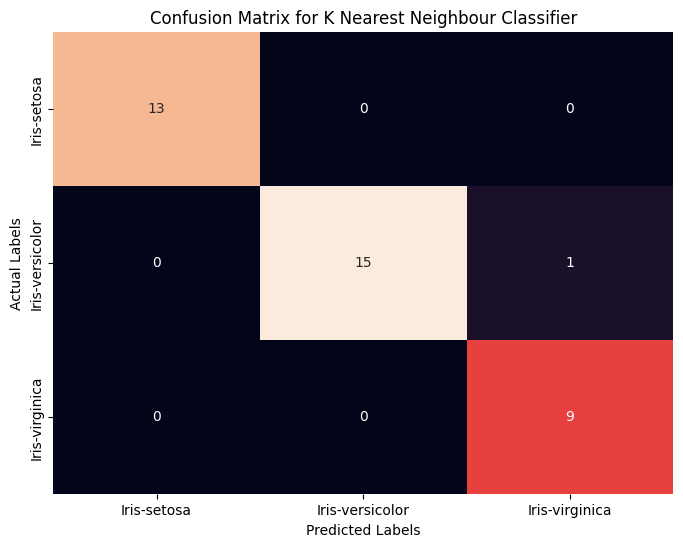

In [11]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cbar=False,xticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],yticklabels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title("Confusion Matrix for K Nearest Neighbour Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()